In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import sklearn.metrics 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
# Implement Learning rate decay
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,LearningRateScheduler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from math import sqrt  
from sklearn.metrics import mean_squared_error, mean_absolute_error
import requests
import os
import h5py
from PIL import Image

2023-05-06 10:53:11.198337: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:

def create_dataset_from_raw():
# 遍历当前子目录内所有图像，逐个处理
    dataset = []
    idxx = 0
    idx = []
    # 取13-17年16——10区域图像
    for i in tqdm(range(1, 20)):
        for j in range(1, 22):
            data = []
            for year in range(2016, 2018):
                file = "target/" + str(year) +"_"+ str(i) +"_"+ str(j) + ".jpg"
                # 读入hdf5格式的图像数据，并转换为numpy数组        
                img = Image.open(file)
                original_image = np.array(img)
                original_image = original_image.reshape(1,original_image.shape[0], original_image.shape[1], original_image.shape[2])
                #归一化
                original_image = original_image / 255.0
                
                #将所有年份的数据放入data
                if(year == 2016):
                    data = original_image
                else:
                    data = np.concatenate((data,original_image),axis=0)
            
            #将数据reshape为（sample， year， height， width， depth）
            data = data.reshape(1, data.shape[0], data.shape[1], data.shape[2], data.shape[3])
            index = np.array([i, j])
            index = index.reshape(1, 2)
            if(idxx == 0):
                dataset = data
                idx = index
            else:
                dataset = np.concatenate((dataset,data),axis=0)
                idx = np.concatenate((idx, index),axis=0)
            idxx += 1
    # 将当前批次内所有图像的处理结果存入`dataset`数组中
    return dataset, idx

In [3]:
val_dataset, index = create_dataset_from_raw()


100%|██████████| 19/19 [00:41<00:00,  2.18s/it]


In [6]:
print(val_dataset.shape)
print(index.shape)

(399, 2, 100, 100, 3)
(399, 2)


In [7]:
model = tf.keras.models.load_model("100_timesteps2.h5", custom_objects={'LeakyReLU':tf.keras.layers.LeakyReLU})

In [8]:
new_prediction = model.predict(val_dataset) 

# new_prediction = np.squeeze(new_prediction, axis=0)

2023-04-11 22:17:48.176583: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudnn.so.7
2023-04-11 22:17:50.658217: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10


In [9]:
print(new_prediction.shape)

(399, 2, 100, 100, 3)


100%|██████████| 399/399 [05:59<00:00,  1.11it/s]


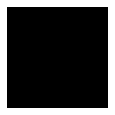

In [10]:



# fig, axes = plt.subplots(2, 5, figsize=(20, 4))

# Plot the original frames.
# year = 2013
# for idx, ax in enumerate(axes[0]):
#     ax.imshow(np.squeeze(val_dataset[idx]), cmap="viridis")
#     ax.set_title(f"Actual {year}")
#     ax.axis("off")
#     year += 1

# Plot the predicted frames.
plt.figure(figsize=(1.4,1.4))
for idx in tqdm(range(0, new_prediction.shape[0])):
    plt.imshow((new_prediction[idx,0,:,:,:]), cmap="viridis")
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.axis("off")
    plt.savefig("result_100_timesteps2/2018_"+str(index[idx, 0])+"_"+str(index[idx, 1])+".png")
    
# Display the figure.


In [12]:
def image_compose():
    IMAGE_ROW = 20
    IMAGE_COLUMN = 22
    IMAGE_SIZE = 100
    to_image = Image.new('RGB',(2155,1902))  # 创建一个新图
    # 循环遍历，把每张图片按顺序粘贴到对应位置上
    for i in range(1, IMAGE_ROW):
        for j in range(1, IMAGE_COLUMN):
            from_image = Image.open('result_100_timesteps4/2018'+"_"+ str(i) +"_"+ str(j) + ".png")
            to_image.paste(from_image, ((j-1) * IMAGE_SIZE, (i-1) * IMAGE_SIZE))
                           
    to_image.save('100_timesteps2_big.png')  # 保存新图

In [13]:
def create_true(Folder, format):
# 遍历当前子目录内所有图像，逐个处理
    dataset = []
    idx = 0
    # 取13-17年16——10区域图像
    for i in tqdm(range(1, 20)):
        data = []
        for j in range(1, 22):
            file = Folder + "/2018_"+ str(i) +"_"+ str(j) + format
            # 读入hdf5格式的图像数据，并转换为numpy数组        
            img = Image.open(file)
            original_image = np.array(img)
            original_image = original_image.reshape(1,original_image.shape[0], original_image.shape[1], original_image.shape[2])

            #将所有年份的数据放入data
            if(j == 1):
                data = original_image
            else:
                data = np.concatenate((data,original_image),axis=0)
            
        if(idx == 0):
            dataset = data
        else:
            dataset = np.concatenate((dataset,data),axis=0)
        idx += 1
    # 将当前批次内所有图像的处理结果存入`dataset`数组中
    return dataset

In [14]:
image_compose()